In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import os
print(os.listdir("/content/drive/My Drive/glaucom"))

['train', 'test', 'Glaucomamodel.h5']


In [0]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
# Initialising the CNN
classifier = Sequential()
# Step 1 - Convolution
classifier.add(Conv2D(32, (3, 3), input_shape = (256,256, 3), activation = 'relu'))
# Step 2 - Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))
# Adding a second convolutional layer
classifier.add(Conv2D(32, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))
# Step 3 - Flattening
classifier.add(Flatten())
# Step 4 - Full connection
classifier.add(Dense(units = 128, activation = 'relu'))
classifier.add(Dense(units = 1, activation = 'sigmoid'))
# Compiling the CNN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.


In [0]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255,
shear_range = 0.2,
zoom_range = 0.2,
horizontal_flip = True)
test_datagen = ImageDataGenerator(rescale = 1./255)
training_set = train_datagen.flow_from_directory('/content/drive/My Drive/glaucom/train',
target_size = (256,256),
batch_size = 32,
class_mode = 'binary')
test_set = test_datagen.flow_from_directory('/content/drive/My Drive/glaucom/test',
target_size = (256,256),
batch_size = 32,
class_mode = 'binary')

Found 2664 images belonging to 2 classes.
Found 811 images belonging to 2 classes.


In [0]:
batch_size=32
model_info=classifier.fit_generator(training_set,
steps_per_epoch = 100/batch_size,
epochs = 30,
validation_data = test_set,
validation_steps = 30/batch_size)

Instructions for updating:
Use tf.cast instead.
Epoch 1/30
4/3 [======================================] - 33s 8s/step - loss: 2.5900 - acc: 0.4844 - val_loss: 1.3291 - val_acc: 0.5625
Epoch 2/30
4/3 [======================================] - 28s 7s/step - loss: 1.0986 - acc: 0.4844 - val_loss: 1.1817 - val_acc: 0.4062
Epoch 3/30
4/3 [======================================] - 26s 7s/step - loss: 0.7169 - acc: 0.6250 - val_loss: 0.7166 - val_acc: 0.4062
Epoch 4/30
4/3 [======================================] - 26s 7s/step - loss: 0.6924 - acc: 0.4844 - val_loss: 0.6554 - val_acc: 0.4688
Epoch 5/30
4/3 [======================================] - 26s 6s/step - loss: 0.6604 - acc: 0.6406 - val_loss: 0.5862 - val_acc: 0.8125
Epoch 6/30
4/3 [======================================] - 25s 6s/step - loss: 0.5689 - acc: 0.7656 - val_loss: 0.4075 - val_acc: 0.8750
Epoch 7/30
4/3 [======================================] - 23s 6s/step - loss: 0.4960 - acc: 0.7891 - val_loss: 0.5930 - val_acc: 0.6562


In [0]:
### Performance evaluation
#########################
score = classifier.evaluate_generator(test_set,811/batch_size)
print(" Total: ", len(test_set.filenames))
print("Loss: ", score[0], "Accuracy: ", score[1])
#print("Accuracy = ",score[1])

 Total:  811
Loss:  0.14874522592849415 Accuracy:  0.9556103575832305


In [0]:
classifier.save('/content/drive/My Drive/glaucom/Gmodel.h5')

In [0]:
import os
from keras.models import load_model
from PIL import Image
from keras.preprocessing import image
import numpy as np
import cv2

In [0]:
target_size = (256,256)
model=load_model('/content/drive/My Drive/glaucom/Gmodel.h5')
print("model loaded")


model loaded


In [0]:
import numpy as np
from keras.preprocessing import image
test_image = image.load_img('/content/drive/My Drive/glaucom/test/class1/img_0_888.jpeg', target_size = (256,256))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image)
training_set.class_indices
if result[0][0] == 1:
 print("Glaucoma")
else:
 print("Not Glaucoma")


Glaucoma


In [0]:
import numpy as np
from keras.preprocessing import image
test_image = image.load_img('/content/drive/My Drive/glaucom/test/class0/img_0_1035.jpeg', target_size = (256,256))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image)
training_set.class_indices
if result[0][0] == 1:
 print("Glaucoma")
else:
 print("Not Glaucoma")


Not Glaucoma


In [0]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from PIL import  Image
%matplotlib inline
plt.style.use('fivethirtyeight')
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

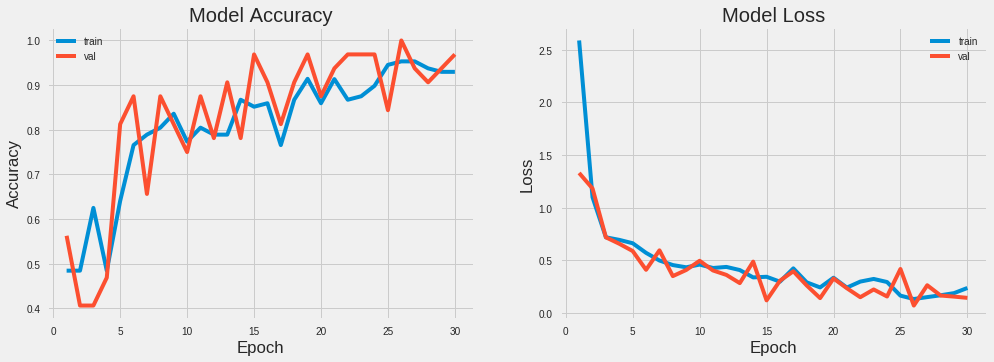

In [0]:
plot_model_history(model_info)